# Swiggy Restaurants Top 50 Cities

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

## Reading CSV

In [2]:
Swiggy_data = pd.read_csv('Swiggy dataset.csv')
Swiggy_data.head(5)

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Area,Locality,Address,Long Distance Delivery
0,KFC,"American,Snacks,Biryani",3.9,400,False,Delhi,Paharganj,KFC Paharganj,"KFC Restaurant 2154, Desh Bandhu Gupta Road, N...",0
1,McDonald's,American,4.3,400,False,Delhi,Kashmere Gate,Delhi ISBT DMRC (GF),"Delhi ISBT DMRC,ISBT DMRC Railway Station. Kas...",0
2,Haldiram's,"Sweets,Snacks,North Indian",4.0,350,True,Delhi,Chandni Chowk,Chandni Chowk,1452/2 Near Fountain Chandni Chowk Delhi 110015,0
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",4.2,150,False,Delhi,Connaught Place,Connaught Place,"Shop No - B1, B Block Middle circle , Connaugh...",0
4,Bikanervala Chandni Chowk,"Street Food,Sweets",4.1,400,False,Delhi,Old Delhi,Old Delhi,"382, NEAR FATEH PUR, CHANDNI CHOWK,110006",0


In [3]:
# Total Rows and columns
Swiggy_data.shape

(31804, 10)

In [4]:
# Column names
Swiggy_data.columns

Index(['Restaurant Name', 'Category', 'Rating', 'Cost for two', 'Veg', 'city',
       'Area', 'Locality', 'Address', 'Long Distance Delivery'],
      dtype='object')

In [5]:
Swiggy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31804 entries, 0 to 31803
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant Name         31804 non-null  object 
 1   Category                31804 non-null  object 
 2   Rating                  14138 non-null  float64
 3   Cost for two            31804 non-null  int64  
 4   Veg                     31804 non-null  bool   
 5   city                    31804 non-null  object 
 6   Area                    31804 non-null  object 
 7   Locality                31780 non-null  object 
 8   Address                 31802 non-null  object 
 9   Long Distance Delivery  31804 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 2.2+ MB


In [6]:
Swiggy_data['Area'].unique()

array(['Paharganj', 'Kashmere Gate', 'Chandni Chowk', ...,
       ' MahaNagar Colony', 'Chhoti Vihar', 'Ashutosh City'], dtype=object)

In [7]:
Swiggy_data['Locality'].unique()

array(['KFC Paharganj', 'Delhi ISBT DMRC (GF)', 'Chandni Chowk', ...,
       'Sanjay NAgar', 'PHEONIX MALL - BAREILLY- UP', 'PVR Bareilly'],
      dtype=object)

## Dropping Irrelevant Columns

In [8]:
Swiggy_data = Swiggy_data.drop(['Address','Area','Locality'],axis = 1)
Swiggy_data.head()

,Restaurant Name,Category,Rating,Cost for two,Veg,city,Long Distance Delivery
0,KFC,"American,Snacks,Biryani",3.9,400,False,Delhi,0
1,McDonald's,American,4.3,400,False,Delhi,0
2,Haldiram's,"Sweets,Snacks,North Indian",4.0,350,True,Delhi,0
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",4.2,150,False,Delhi,0
4,Bikanervala Chandni Chowk,"Street Food,Sweets",4.1,400,False,Delhi,0


## Dropping Duplicates

In [9]:
Swiggy_data.drop_duplicates(inplace = True)
Swiggy_data.shape

(31803, 7)

In [10]:
Swiggy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31803 entries, 0 to 31803
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant Name         31803 non-null  object 
 1   Category                31803 non-null  object 
 2   Rating                  14137 non-null  float64
 3   Cost for two            31803 non-null  int64  
 4   Veg                     31803 non-null  bool   
 5   city                    31803 non-null  object 
 6   Long Distance Delivery  31803 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 1.7+ MB


In [11]:
Swiggy_data.describe()

,Rating,Cost for two,Long Distance Delivery
count,14137.000000,31803.000000,31803.000000
mean,3.907717,289.798415,0.358425
std,0.456518,174.898371,0.479545
min,1.100000,0.000000,0.000000
25%,3.700000,200.000000,0.000000
50%,4.000000,250.000000,0.000000
75%,4.200000,300.000000,1.000000
max,5.000000,3100.000000,1.000000


In [12]:
Swiggy_data['Rating'].unique()

array([3.9, 4.3, 4. , 4.2, 4.1, 3.7, nan, 4.5, 3.8, 3.4, 3.6, 4.4, 2.8,
       2.7, 3. , 3.2, 4.6, 3.5, 5. , 3.3, 3.1, 2.6, 4.7, 2.9, 4.8, 4.9,
       1.7, 1.9, 2.1, 2.3, 2.4, 2. , 2.5, 2.2, 1.5, 1.6, 1.8, 1.3, 1.1,
       1.2])

In [13]:
Swiggy_data.Rating.isnull().sum()

17666

## Filling Null Values in Rating Column with Mean

In [14]:
Swiggy_data['Rating'].fillna(Swiggy_data['Rating'].mean(),inplace = True)
Swiggy_data['Rating'].isnull().sum()

0

In [15]:
Swiggy_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31803 entries, 0 to 31803
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant Name         31803 non-null  object 
 1   Category                31803 non-null  object 
 2   Rating                  31803 non-null  float64
 3   Cost for two            31803 non-null  int64  
 4   Veg                     31803 non-null  bool   
 5   city                    31803 non-null  object 
 6   Long Distance Delivery  31803 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 1.7+ MB


## Replacing Column Name

In [16]:
Swiggy_data.rename(columns = {'Cost for two':'Cost2plates','Long Distance Delivery':'Delivery'},inplace = True)
Swiggy_data.head()

,Restaurant Name,Category,Rating,Cost2plates,Veg,city,Delivery
0,KFC,"American,Snacks,Biryani",3.9,400,False,Delhi,0
1,McDonald's,American,4.3,400,False,Delhi,0
2,Haldiram's,"Sweets,Snacks,North Indian",4.0,350,True,Delhi,0
3,Chai Point,"Bakery,Beverages,Maharashtrian,Snacks,Street F...",4.2,150,False,Delhi,0
4,Bikanervala Chandni Chowk,"Street Food,Sweets",4.1,400,False,Delhi,0


## Cleaning Category Column

In [17]:
Category = Swiggy_data['Category'].value_counts(ascending = False)
Category

Indian                                             1125
Chinese                                            1021
North Indian                                        940
Bakery                                              853
Snacks                                              536
                                                   ... 
North Indian,Indian,Chinese,Tandoor,Beverages         1
Indian,Mughlai,Biryani,Tandoor                        1
Thai,Korean,Japanese,Chinese                          1
Lucknowi,North Indian,Fast Food,Punjabi               1
Pizzas,Beverages,Pastas,Italian,Desserts,Snacks       1
Name: Category, Length: 9475, dtype: int64

In [18]:
Category_lessthan300 = Category[Category<300]
Category_lessthan300

Biryani                                            274
Chinese,Snacks                                     252
Ice Cream,Desserts                                 240
Fast Food,Snacks                                   189
Ice Cream                                          187
                                                  ... 
North Indian,Indian,Chinese,Tandoor,Beverages        1
Indian,Mughlai,Biryani,Tandoor                       1
Thai,Korean,Japanese,Chinese                         1
Lucknowi,North Indian,Fast Food,Punjabi              1
Pizzas,Beverages,Pastas,Italian,Desserts,Snacks      1
Name: Category, Length: 9462, dtype: int64

## Making Category less than 300 in frequency as others

In [19]:
def Handle_Category(value):
    if value in Category_lessthan300:
        return 'others'
    else:
        return value
    
Swiggy_data['Category'] = Swiggy_data['Category'].apply(Handle_Category)
Swiggy_data['Category'].value_counts()

others                  24209
Indian                   1125
Chinese                  1021
North Indian              940
Bakery                    853
Snacks                    536
Pizzas                    482
Beverages                 459
South Indian              430
North Indian,Chinese      377
Fast Food                 368
Desserts                  362
Bakery,Desserts           337
Indian,Chinese            304
Name: Category, dtype: int64

# Visualization



## Visualizing Total Resturants in Cities

Text(0.5, 1.0, 'Total Restaurants in Cities')

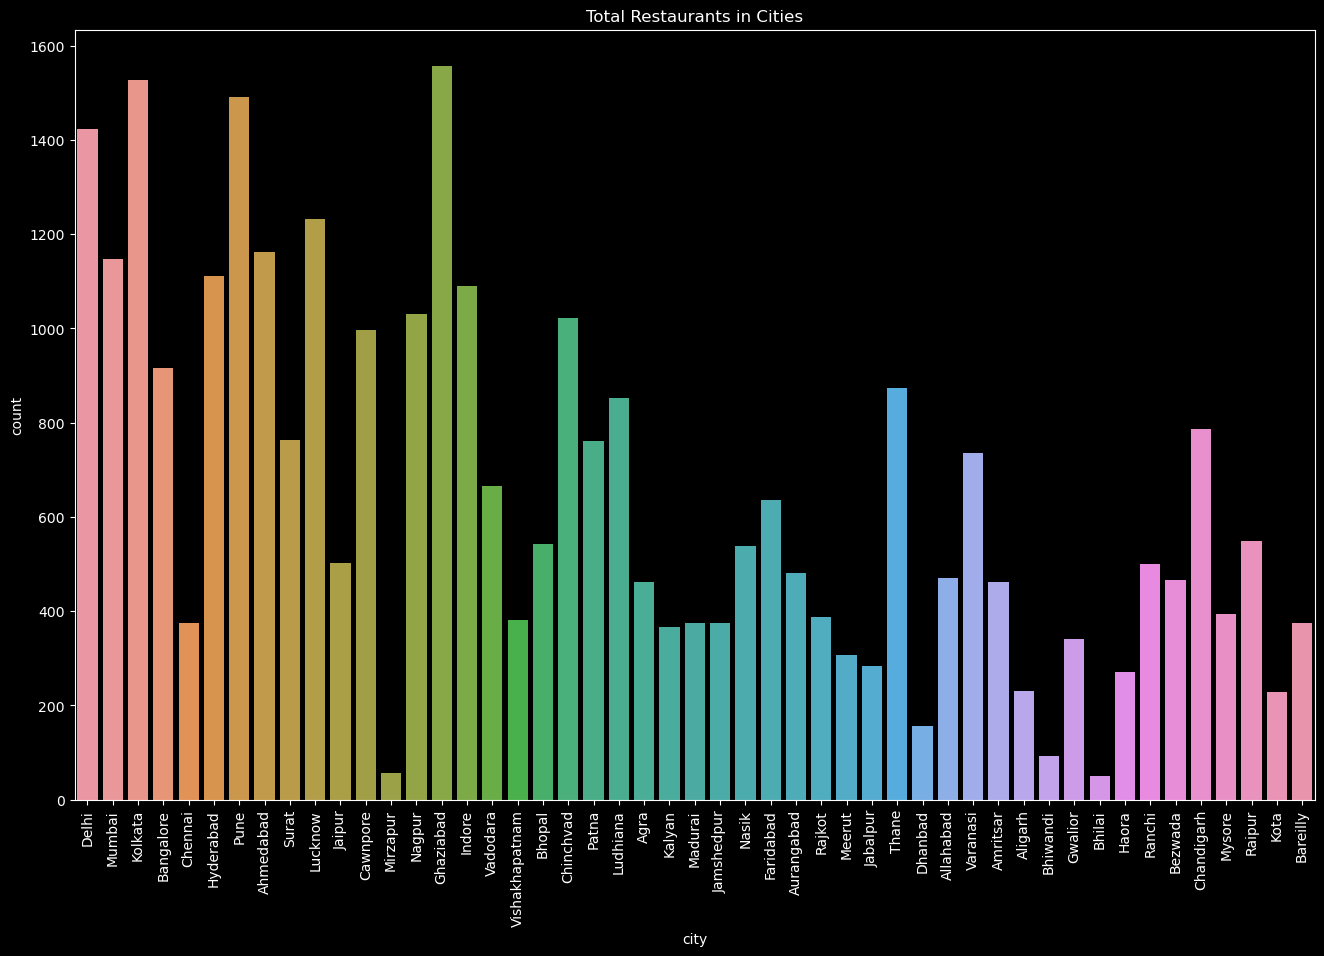

In [20]:
plt.figure(figsize = (16,10))
ax = sns.countplot(Swiggy_data['city'])
plt.xticks(rotation = 90)
plt.title('Total Restaurants in Cities')

## Visualizing Food Delivery

<AxesSubplot:xlabel='Delivery', ylabel='count'>

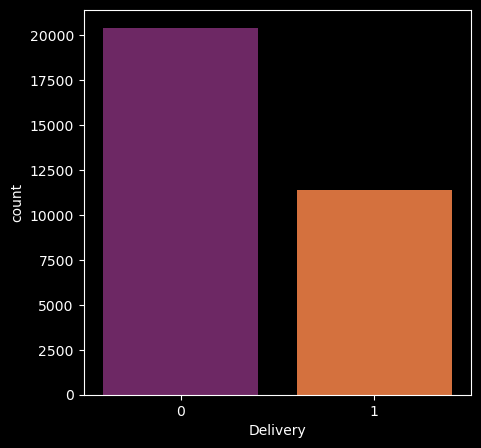

In [21]:
# 0 means food delivery not available and 1 means food delivery is available 
plt.figure(figsize = (5,5))
sns.countplot(Swiggy_data['Delivery'],palette = 'inferno')

## Visualizing Restaurant type (Veg or Nonveg)

Text(0.5, 1.0, 'Restaurant Type')

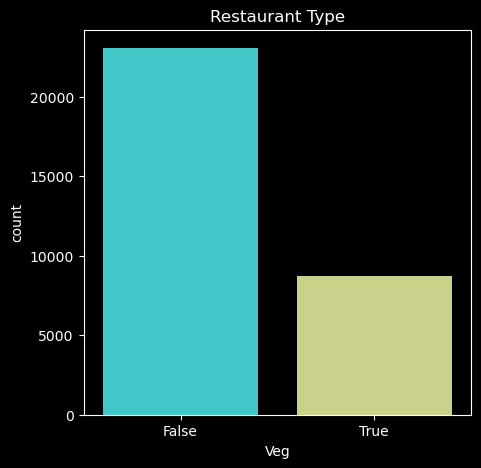

In [22]:
# True means Veg and False means non-veg 
plt.figure(figsize = (5,5))
sns.countplot(Swiggy_data['Veg'],palette = 'rainbow')
plt.title('Restaurant Type')

## Visualizing Food Delivery VS Rating

<AxesSubplot:xlabel='Delivery', ylabel='Rating'>

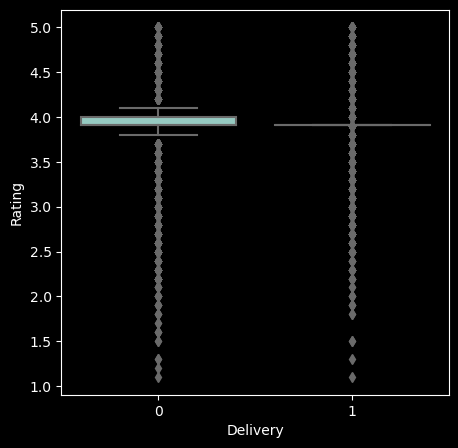

In [23]:
plt.figure(figsize = (5,5))
sns.boxplot(x = 'Delivery', y = 'Rating', data = Swiggy_data)

## Visualizing City wise Ratings of Restro

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 [Text(0, 0, 'Delhi'),
  Text(1, 0, 'Mumbai'),
  Text(2, 0, 'Kolkata'),
  Text(3, 0, 'Bangalore'),
  Text(4, 0, 'Chennai'),
  Text(5, 0, 'Hyderabad'),
  Text(6, 0, 'Pune'),
  Text(7, 0, 'Ahmedabad'),
  Text(8, 0, 'Surat'),
  Text(9, 0, 'Lucknow'),
  Text(10, 0, 'Jaipur'),
  Text(11, 0, 'Cawnpore'),
  Text(12, 0, 'Mirzapur'),
  Text(13, 0, 'Nagpur'),
  Text(14, 0, 'Ghaziabad'),
  Text(15, 0, 'Indore'),
  Text(16, 0, 'Vadodara'),
  Text(17, 0, 'Vishakhapatnam'),
  Text(18, 0, 'Bhopal'),
  Text(19, 0, 'Chinchvad'),
  Text(20, 0, 'Patna'),
  Text(21, 0, 'Ludhiana'),
  Text(22, 0, 'Agra'),
  Text(23, 0, 'Kalyan'),
  Text(24, 0, 'Madurai'),
  Text(25, 0, 'Jamshedpur'),
  Text(26, 0, 'Nasik'),
  Text(27, 0, 'Faridabad'),
  Text(28, 0, 'Aurangabad'),
  Text(29, 0, 'Rajkot'),


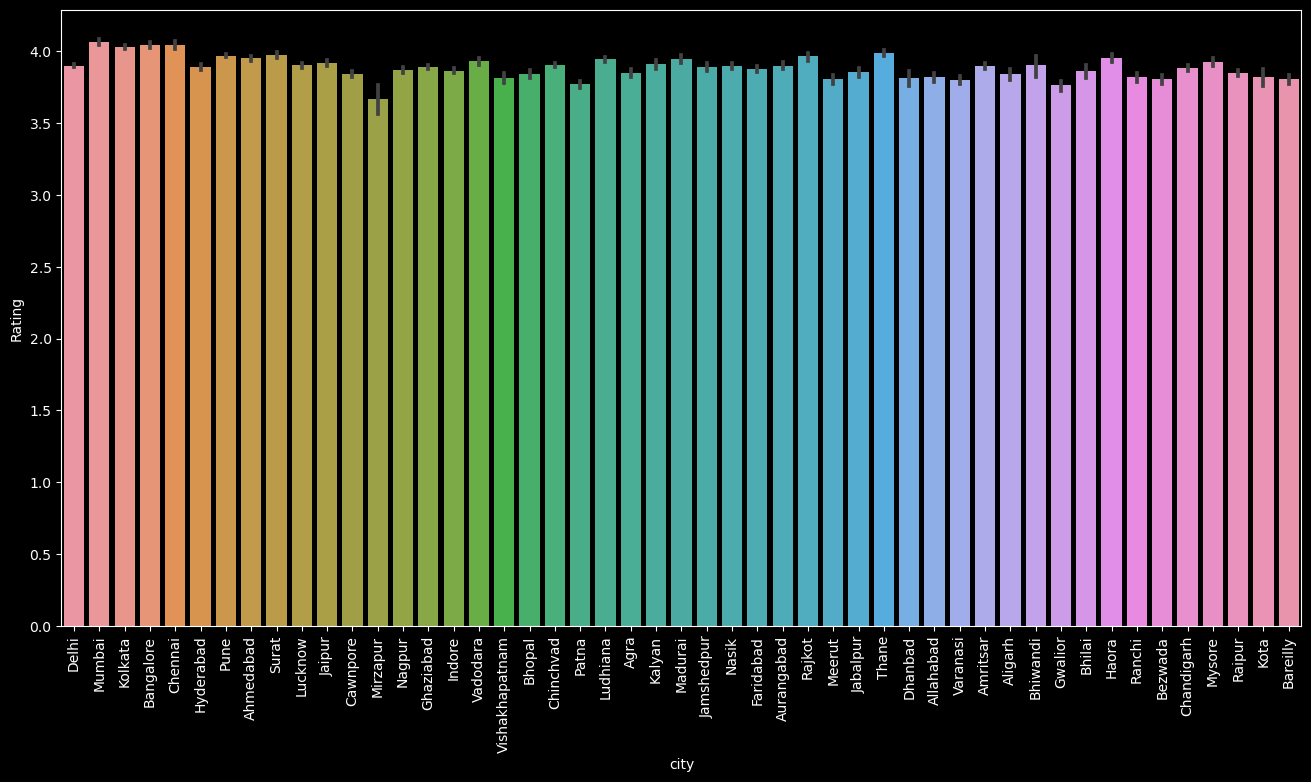

In [24]:
plt.figure(figsize = (16,8))
sns.barplot(x = 'city', y = 'Rating', data = Swiggy_data)
plt.xticks(rotation = 90)

### Cities with Highest Rated Resturants

In [25]:
top_10_rated = Swiggy_data.groupby('city')['Rating'].agg('mean').sort_values(ascending=False).head(10)
top_10_rated = top_10_rated.reset_index()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'Bangalore'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Thane'),
  Text(5, 0, 'Surat'),
  Text(6, 0, 'Pune'),
  Text(7, 0, 'Rajkot'),
  Text(8, 0, 'Haora'),
  Text(9, 0, 'Ahmedabad')])

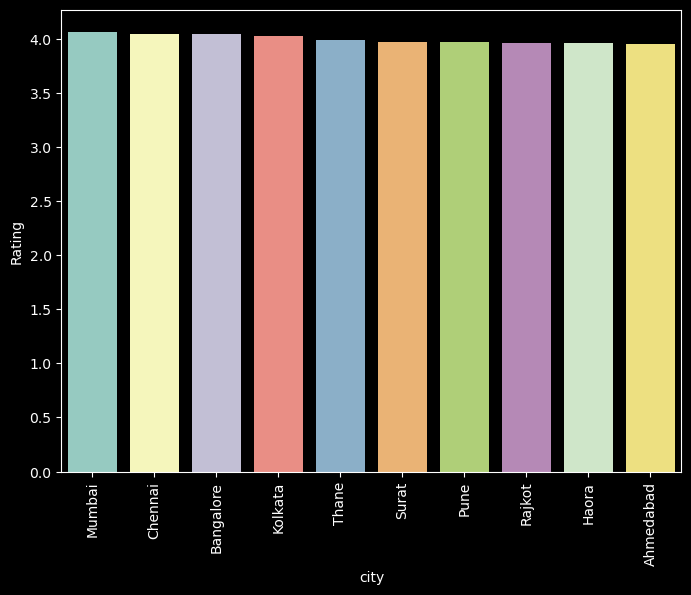

In [26]:
plt.figure(figsize=(8,6))
sns.barplot('city','Rating',data=top_10_rated)
plt.xticks(rotation=90)

## Visualizing long Distance Delivery Facility, City wise

In [27]:
df = Swiggy_data.groupby(['city','Delivery'])['Restaurant Name'].count()
df.to_csv('city_Delivery.csv')
df = pd.read_csv('city_Delivery.csv')
df = pd.pivot_table(df, values = None, index=['city'], columns=['Delivery'], fill_value=0, aggfunc = np.sum)
df

Restaurant Name      
Delivery                     0     1
city                                
Agra                       369    93
Ahmedabad                 1097    65
Aligarh                    227     4
Allahabad                  412    59
Amritsar                   337   124
Aurangabad                 471    11
Bangalore                  913     4
Bareilly                   361    15
Bezwada                    256   210
Bhilai                       5    46
Bhiwandi                    25    67
Bhopal                     334   208
Cawnpore                   743   253
Chandigarh                  99   687
Chennai                    374     0
Chinchvad                  233   789
Delhi                      201  1223
Dhanbad                    156     0
Faridabad                  295   342
Ghaziabad                  310  1246
Gwalior                    342     0
Haora                      225    46
Hyderabad                  227   885
Indore                     666   423
Jabalpur                   272    11
Jaipur                     209   294
Jamshedpur                 373     1
Kalyan                     240   126
Kolkata                    577   950
Kota                       228     0
Lucknow                    709   523
Ludhiana                   592   261
Madurai                    347    29
Meerut                     247    61
Mirzapur                    56     0
Mumbai                     674   473
Mysore                     331    64
Nagpur                     759   272
Nasik                      538     0
Patna                      724    37
Pune                       476  1016
Raipur                     547     1
Rajkot                     388     0
Ranchi                     501     0
Surat                      731    32
Thane                      604   270
Vadodara                   665     0
Varanasi                   600   135
Vishakhapatnam             338    43

<AxesSubplot:xlabel='city'>

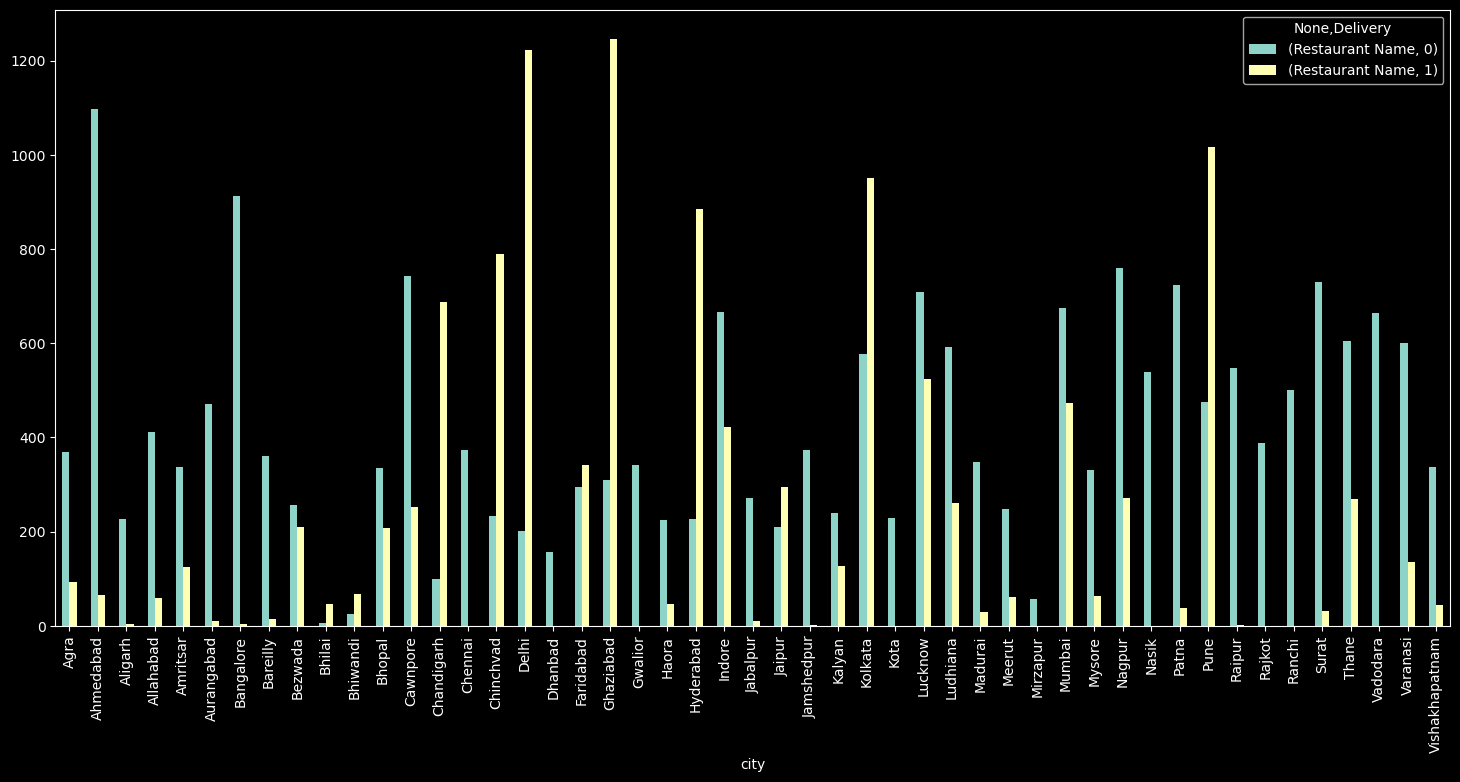

In [28]:
df.plot(kind = 'bar',figsize= (18,8))